# Dynamic Memory Allocation (The Heap)

## 1. Heap Memory

### Properties of Heap Memory
![1 - ND213 C03 L03 01.1 Heap Memory HS.mp4](attachment:1 - ND213 C03 L03 01.1 Heap Memory HS.mp4)

Heap memory, also know as dynamic memory , is an important resource available to programs (and programmers) to store data. The following diagram again shows the layout of virtual memory with the heap being right above the BSS and Data segment.

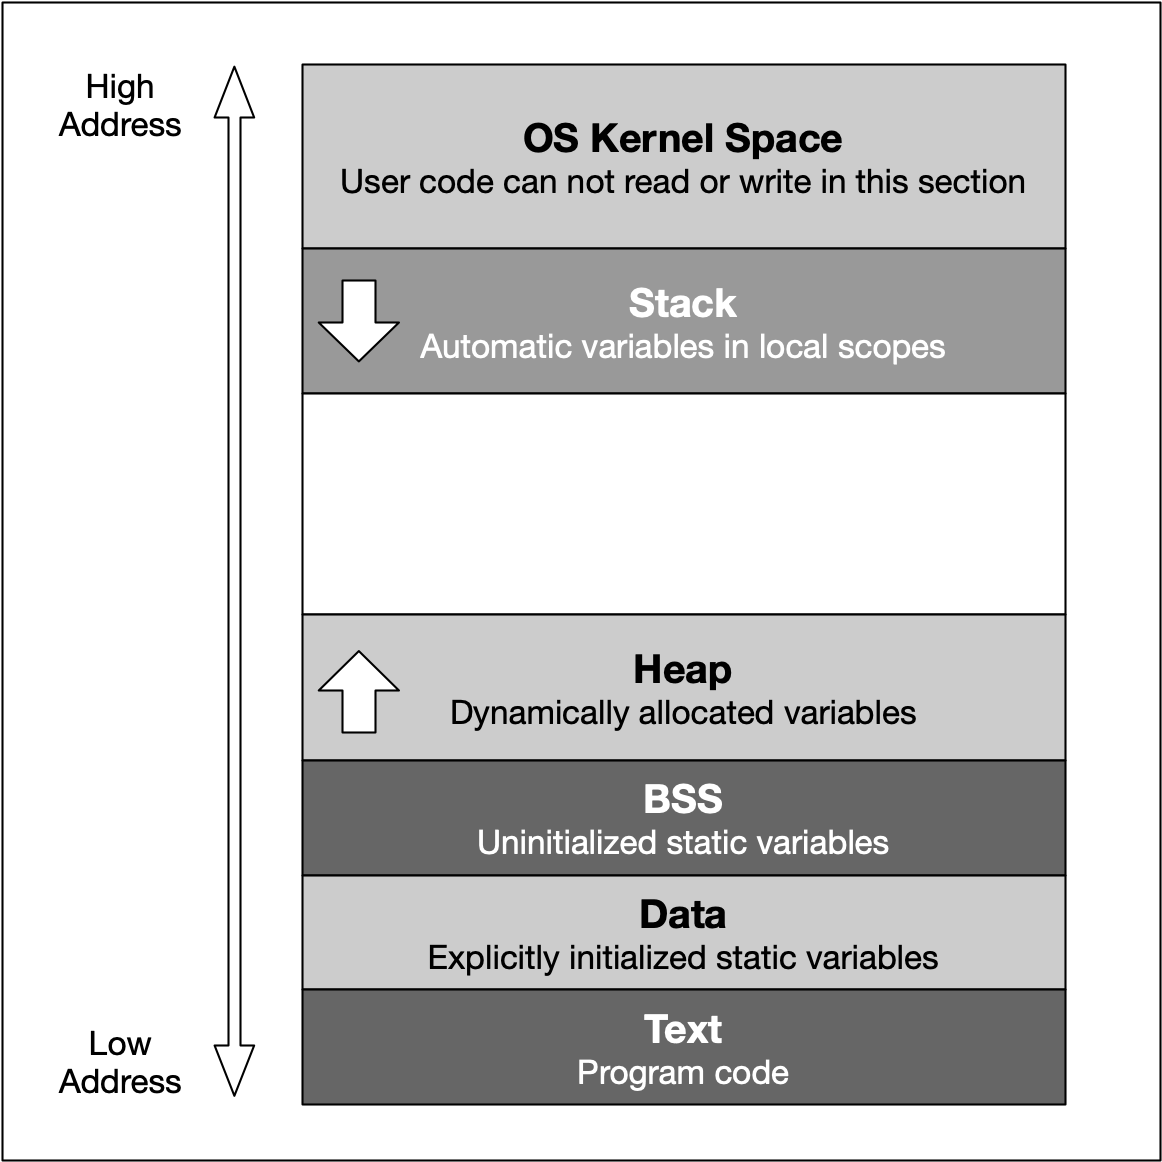

As mentioned earlier, the heap memory grows upwards while the stack grows in the opposite direction. We have seen in the last lesson that the automatic stack memory shrinks and grows with each function call and local variable. As soon as the scope of a variable is left, it is automatically deallocated and the stack pointer is shifted upwards accordingly.

Heap memory is different in many ways: The programmer can request the allocation of memory by issuing a command such as `malloc` or `new` (more on that shortly). This block of memory will remain allocated until the programmer explicitly issues a command such as `free` or `delete`. The huge advantage of heap memory is the high degree of control a programmer can exert, albeit at the price of greater responsibility since memory on the heap must be actively managed.

Let us take a look at some properties of heap memory:

1. As opposed to local variables on the stack, memory can now be allocated in an arbitrary scope (e.g. inside a function) without it being deleted when the scope is left. Thus, as long as the address to an allocated block of memory is returned by a function, the caller can freely use it.

2. Local variables on the stack are allocated at compile-time. Thus, the size of e.g. a string variable might not be appropriate as the length of the string will not be known until the program is executed and the user inputs it. With local variables, a solution would be to allocate a long-enough array of and hope that the actual length does not exceed the buffer size. With dynamically allocated heap memory, variables are allocated at run-time. This means that the size of the above-mentioned string variable can be tailored to the actual length of the user input.

3. Heap memory is only constrained by the size of the address space and by the available memory. With modern 64 bit operating systems and large RAM memory and hard disks the programmer commands a vast amount of memory. However, if the programmer forgets to deallocate a block of heap memory, it will remain unused until the program is terminated. This is called a "memory leak".

4. Unlike the stack, the heap is shared among multiple threads, which means that memory management for the heap needs to take concurrency into account as several threads might compete for the same memory resource.

5. When memory is allocated or deallocated on the stack, the stack pointer is simply shifted upwards or downwards. Due to the sequential structure of stack memory management, stack memory can be managed (by the operating system) easily and securely. With heap memory, allocation and deallocation can occur arbitrarily, depending on the lifetime of the variables. This can result in fragmented memory over time, which is much more difficult and expensive to manage.

### Memory Fragmentation
Let us construct a theoretic example of how memory on the heap can become fragmented: Suppose we are interleaving the allocation of two data types X and Y in the following fashion: First, we allocate a block of memory for a variable of type X, then another block for Y and so on in a repeated manner until some upper bound is reached. At the end of this operation, the heap might look like the following:

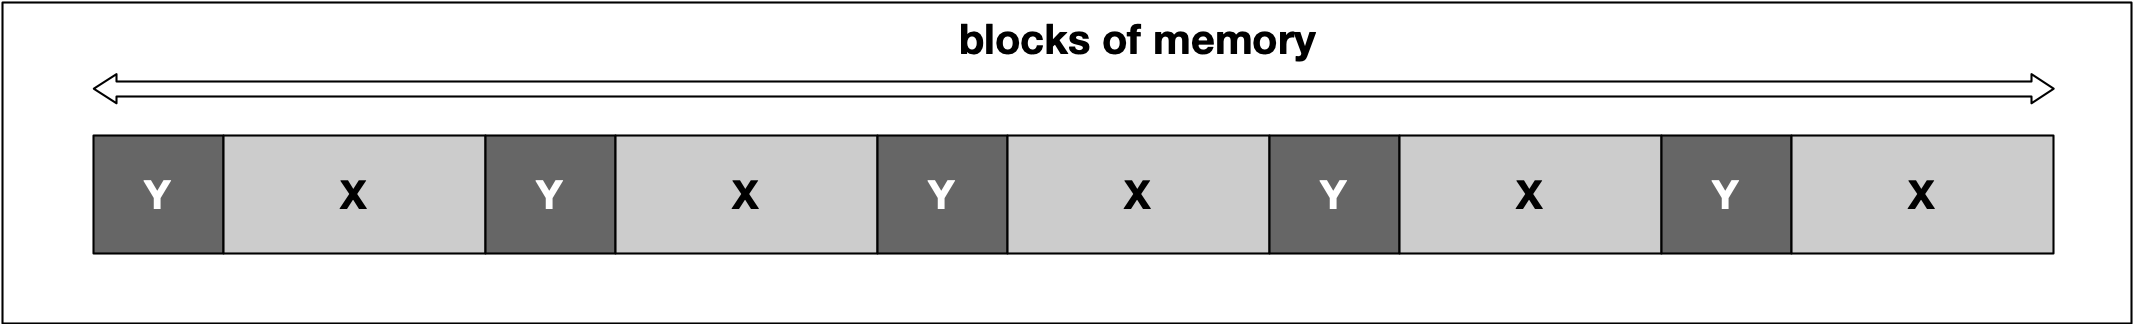

At some point, we might then decide to deallocate all variables of type `Y`, leading to empty spaces in between the remaining variables of type `X`. In between two blocks of type `X`, no memory for an additional `X` could now be squeezed in this example.

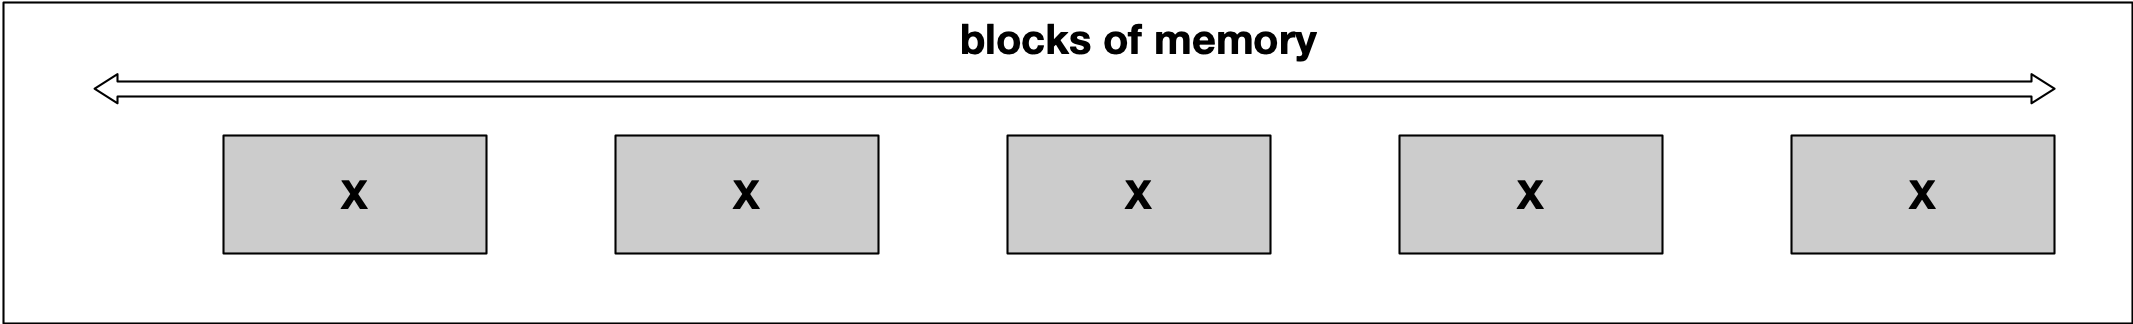

A classic symptom of memory fragmentation is that you try to allocate a large block and you can’t, even though you appear to have enough memory free. On systems with virtual memory however, this is less of a problem, because large allocations only need to be contiguous in virtual address space, not in physical address space.

When memory is heavily fragmented however, memory allocations will likely take longer because the memory allocator has to do more work to find a suitable space for the new object.

Until now, our examples have been only theoretical. It is time to gain some practical experience in the next section using `malloc` and `free` as C-style methods for dynamic memory management.

### Outro
![2 - ND213 C03 L03 01.2 Heap Memory HS.mp4](attachment:2 - ND213 C03 L03 01.2 Heap Memory HS.mp4)

## 2. Bjarne on Stack and Heap
![3 - ND213 C03 Stack And Heap What Is The Difference Between The Stack And The Heap-.mp4](attachment:3 - ND213 C03 Stack And Heap What Is The Difference Between The Stack And The Heap-.mp4)

## 3. Using malloc and free
![4 - ND213 C03 L03 02.1 Using Malloc And Free HS.mp4](attachment:4 - ND213 C03 L03 02.1 Using Malloc And Free HS.mp4)

So far we only considered primitive data types, whose storage space requirement was already fixed at compile time and could be scheduled with the building of the program executable. However, it is not always possible to plan the memory requirements exactly in advance, and it is inefficient to reserve the maximum memory space each time just to be on the safe side. C and C++ offer the option to reserve memory areas during the program execution, i.e. at runtime. It is important that the reserved memory areas are released again at the "appropriate point" to avoid memory leaks. It is one of the major challenges in memory management to always locate this "appropriate point" though.

> Refer to the workspace

### Quiz : Dynamic Memory Management with malloc, calloc, resize and free

#### Question 1: Match the code snippets to the respective comments
```c++
#include <stdio.h> 
#include <stdlib.h> 

int main()
{
    // (X)
    int *m = (int*)malloc(sizeof(int)); 
    m = NULL; 

    // (Y)
    int *n = (int*)malloc(sizeof(int)); 
    free(n);
    *n = 23;

    // (Z)
    char *o;
    *o = 'a'; 

    return 0;
}
```

Comments:
1. uses a dangling pointer
2. uses an uninitialized pointer
3. generates a memory leak

##### QUESTION 1 OF 2
In the code above, there are three snippets marked with X, Y, and Z. Below the code there are three comments. Match the code snippets to the respective comments. Which pairing of comments and code snippets is the correct one?

##### ANSWER: X-3, Y-1, Z-2

#### Question 2 : Problems with pointers
```